<a href="https://colab.research.google.com/github/yujiimt/NLP/blob/master/book/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [22]:
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_JP_v1_00.tsv.gz -P data/
!gunzip -d data/amazon_reviews_multilingual_JP_v1_00.tsv.gz

--2020-04-30 17:58:21--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_JP_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.133.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.133.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94688992 (90M) [application/x-gzip]
Saving to: ‘data/amazon_reviews_multilingual_JP_v1_00.tsv.gz’

amazon_reviews_mult 100%[===================>]  90.30M  16.3MB/s    in 6.8s    

2020-04-30 17:58:29 (13.3 MB/s) - ‘data/amazon_reviews_multilingual_JP_v1_00.tsv.gz’ saved [94688992/94688992]



In [0]:
model = Sequential()
model.add(Dense(units=32, activation = 'relu', input_shape = (16,)))
model.add(Dense(units=5, activation = 'softmax'))

In [7]:
import numpy as np

inputs = np.ones((1, 16), dtype = np.float32)
model(inputs)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.10000955, 0.26388747, 0.39590535, 0.13636841, 0.10382928]],
      dtype=float32)>

In [0]:
x = Input(shape=(16,))
h = Dense(units=32, activation = 'relu')(x)
y = Dense(units=5, activation = 'softmax')(h)
model = Model(inputs=[x], outputs=[y])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [0]:
def create_model(vocab_size, label_size, hidden_size=16):
    model = Sequential()
    model.add(Dense(hidden_size, activation = 'relu', input_shape=(vocab_size,)))
    model.add(Dense(label_size, activation = 'softmax'))
    return model

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [18]:
ModelCheckpoint(filepath,
                monitor='val_loss',
                verbose=0,
                save_best_only=False,
                save_weights_only=False,
                mode='auto',
                period=1)

NameError: ignored

In [0]:
import math
from tensorflow.keras.utils import Sequence

class Generator(Sequence):

  def __init__(self, x, y, batch_size = 32):
    self.x = x
    self.y = y
    self.batch_size = batch_size

  def __getitem__(self, idx):
      batch_x = self.x[idx* self.batch_size: (idx + 1) * self.batch_size]
      batch_y = self.y[idx* self.batch_size: (idx + 1) * self.batch_size]
      return batch_x, batch_y

  def __len__(self):
      return math.ceil(len(self.x) / self.batch_size)

In [0]:
import matplotlib.pyplot as plt


def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(1, len(loss) + 1)


  plt.plot(epochs, loss, 'r', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = "Validation loss")
  plt.title('Training and validation loass')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.figure()

  plt.plot(epochs, acc, 'r', label = 'Training acc')
  plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  
  plt.show()

In [23]:
import string
import pandas as pd
!pip install janome
from bs4 import BeautifulSoup
from janome.tokenizer import Tokenizer

t = Tokenizer(wakati = True)

def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold


def load_dataset(filename, n=5000, state = 6):
  df = pd.read_csv(filename, sep = '\t')

  # マルチクラスに変更
  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #日本語処理
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  # sampling
  df = df.sample(frac = 1, random_state = state)
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values
def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip =  strip)
  return text
  
def tokenize(text):
  return t.tokenize(text)

     |████████████████████████████████| 21.5MB 1.5MB/s 


Epoch 1/100
200/200 [==============================] - 3s 14ms/step - loss: 0.5256 - accuracy: 0.7861 - val_loss: 0.4374 - val_accuracy: 0.8294
Epoch 2/100
200/200 [==============================] - 3s 15ms/step - loss: 0.2588 - accuracy: 0.9203 - val_loss: 0.4106 - val_accuracy: 0.8331
Epoch 3/100
200/200 [==============================] - 3s 15ms/step - loss: 0.1389 - accuracy: 0.9680 - val_loss: 0.4241 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 3s 15ms/step - loss: 0.0765 - accuracy: 0.9881 - val_loss: 0.4648 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 3s 15ms/step - loss: 0.0448 - accuracy: 0.9945 - val_loss: 0.5087 - val_accuracy: 0.8331
[[0.3091126 0.6908874]]


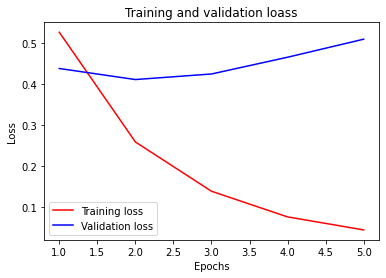

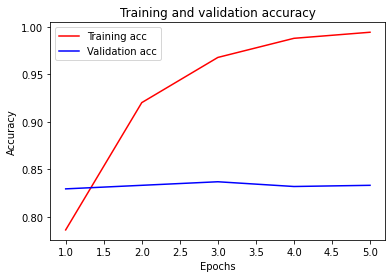

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


def main():
  x,y = load_dataset('/content/data/amazon_reviews_multilingual_JP_v1_00.tsv', n=5000)

  x = [clean_html(text, strip = True) for text in x]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  vectorizer = CountVectorizer(tokenizer=tokenize)
  x_train = vectorizer.fit_transform(x_train)
  x_test = vectorizer.transform(x_test)
  x_train = x_train.toarray()
  x_test = x_test.toarray()


  vocab_size = len(vectorizer.vocabulary_)
  label_size = len(set(y_train))

  model = create_model(vocab_size, label_size)
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
  
  filepath = 'model.h5'
  callbacks = [
               EarlyStopping(patience=3),
               ModelCheckpoint(filepath, save_best_only = True)
  ]

  history = model.fit(x_train, y_train,
                      validation_split = 0.2,
                      epochs = 100,
                      best_size = 32,
                      callbacks=callbacks)
  
  model = load_model(filepath)


  text = 'このアプリ最高！'
  vec = vectorizer.transform([text])
  y_pred = model.predict(vec.toarray())
  print(y_pred)


  plot_history(history)


if __name__ == '__main__':
    main()

In [0]:
ri